In [13]:
# 0
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [19]:
# 1
model.similarity("United_States", "U.S.")

0.73107743

In [18]:
# 2
model.most_similar("United_States", topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

In [23]:
# 3
vec = model["Spain"] - model["Madrid"] + model["Athens"]
model.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

In [31]:
# 4
with open("questions-words.txt", "r") as f1, open("chapter7-4.txt", "w") as f2:
    for line in f1.readlines():
        line = line.rstrip("\n").split(" ")
        if line[0] == ":":
            category = line[1]
        else:
            word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            res = " ".join([category] + line + [word, str(cos) + "\n"])
            f2.write(res)

In [44]:
# 5
import pandas as pd

df = pd.read_csv("chapter7-4.txt", sep=" ", header=None)
sem = df[~df[0].str.contains("gram")]
syn = df[df[0].str.contains("gram")]
print(f"Semantic Analogy Accuracy:  {sum(sem[4] == sem[5]) / len(sem):.3f}")
print(f"Syntatic Analogy Accuracy:  {sum(syn[4] == syn[5]) / len(syn):.3f}")

Semantic Analogy Accuracy:  0.731
Syntatic Analogy Accuracy:  0.740


In [67]:
# 6
from scipy.stats import spearmanr
df = pd.read_csv("wordsim353/combined.csv")

model_score = []
for i in range(len(df)):
    word1, word2 = df.iloc[i][["Word 1", "Word 2"]]
    score = model.similarity(word1, word2)
    model_score.append(score)

df["Model"] = model_score

corr, pvalue = spearmanr(df["Human (mean)"].tolist(), df["Model"].tolist())
print(f"Spearmanr Correlation Coefficient: {corr:.3f}")

Spearmanr Correlation Coefficient: 0.700


In [72]:
# 7
from sklearn.cluster import KMeans

df = pd.read_csv("chapter7-4.txt", sep=" ")

countries = set()

for i in range(len(df)):
    category = df.iloc[i][0]
    if category in ["capital-common-countrie", "capital-world"]:
        countries.add(df.iloc[i][2])
    elif category in ["currency", "gram6-nationality-adjective"]:
        countries.add(df.iloc[i][1])

country_vec = [model[country] for country in list(countries)]

kmeans = KMeans(n_clusters=5, random_state=42)
pred = kmeans.fit_predict(country_vec)

In [82]:
countries = np.array(list(countries))

for c in np.unique(pred):
    mask = pred == c
    print(f"Cluster {c}")
    print(countries[mask], "\n")

Cluster 0
['Botswana' 'Guinea' 'Namibia' 'Algeria' 'Liberia' 'Eritrea' 'Uganda'
 'Ghana' 'Zambia' 'Kenya' 'Egypt' 'Angola' 'Zimbabwe' 'Sudan' 'Mauritania'
 'Rwanda' 'Senegal' 'Somalia' 'Syria' 'Madagascar' 'Niger' 'Gabon'
 'Lebanon' 'Mozambique' 'Mali' 'Nigeria' 'Malawi' 'Burundi' 'Tunisia'
 'Libya' 'Gambia'] 

Cluster 1
['Laos' 'Japan' 'Fiji' 'Bahrain' 'China' 'Taiwan' 'Philippines'
 'Afghanistan' 'Korea' 'Cambodia' 'Pakistan' 'Nepal' 'Oman' 'Bangladesh'
 'Vietnam' 'Malaysia' 'Iraq' 'India' 'Indonesia' 'Bhutan' 'Thailand'] 

Cluster 2
['Bahamas' 'Chile' 'Samoa' 'Jamaica' 'Cuba' 'Honduras' 'Tuvalu' 'Suriname'
 'Belize' 'Peru' 'Mexico' 'Nicaragua' 'Ecuador' 'Colombia' 'Venezuela'
 'Dominica' 'Guyana'] 

Cluster 3
['Ukraine' 'Tajikistan' 'Azerbaijan' 'Latvia' 'Armenia' 'Bulgaria'
 'Turkey' 'Kyrgyzstan' 'Hungary' 'Montenegro' 'Estonia' 'Cyprus' 'Albania'
 'Turkmenistan' 'Belarus' 'Russia' 'Romania' 'Slovakia' 'Macedonia' 'Iran'
 'Slovenia' 'Georgia' 'Uzbekistan' 'Poland' 'Greece' 'Croatia

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [40.0, 40.0, 63.75, 63.75],
  [12.5, 12.5, 51.875, 51.875],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [102.5, 102.5, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [160.0, 160.0, 184.375, 184.375],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [172.1875, 172.1875, 233.75, 233.75],
  [117.5, 117.5, 202.96875, 202.96875],
  [32.1875, 32.1875, 160.234375, 160.234375],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 

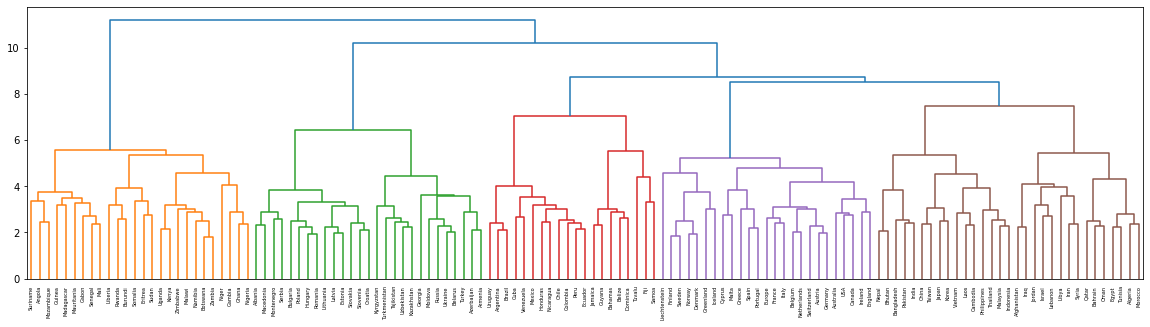

In [89]:
# 8
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(20, 5))
cluster = linkage(country_vec, method="ward")
dendrogram(cluster, labels=list(countries))

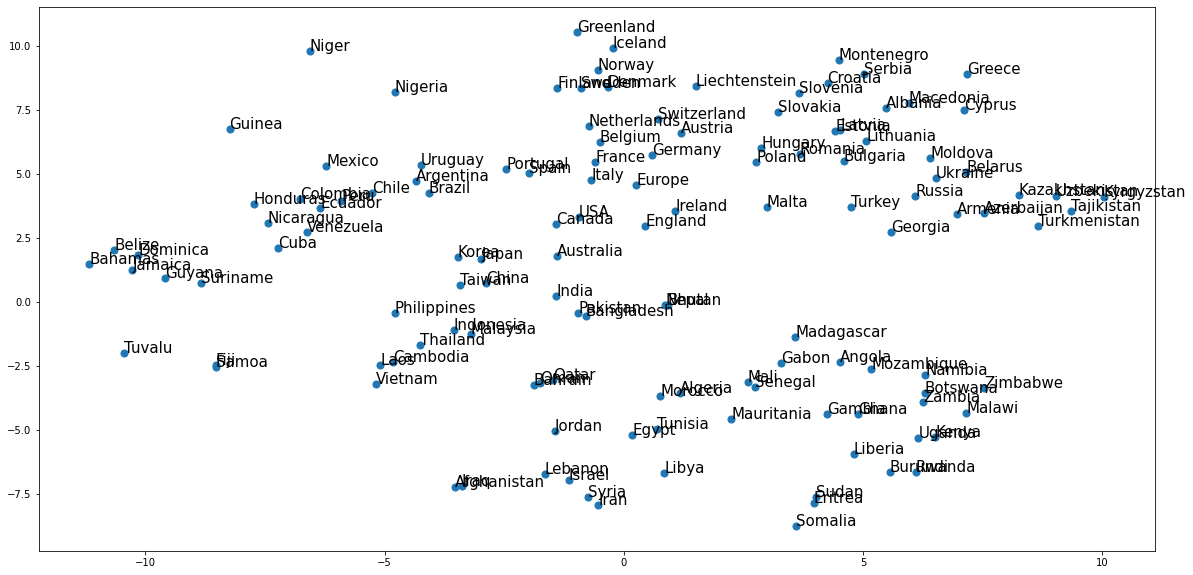

In [103]:
# 9
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, n_iter=1000)
embed = tsne.fit_transform(country_vec)

plt.figure(figsize=(20, 10))
plt.scatter(embed[:, 0], embed[:, 1], s=50)

for i, label in enumerate(countries):
    plt.text(embed[i, 0], embed[i, 1], label, fontsize=15)